# Краткое описание проекта

На основании подготовленного списка гипотез для увеличения выручки выполнить приоритизацию данных гипотез, запустить A/B-тест и проанализировать результаты. 

# Цель проекта
## Часть 1. Приоритизация гипотез:

### Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
### Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

## Часть 2. Анализ A/B-теста:
### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
### Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

# Описание данных

1. Данные для первой части
    - Файл /datasets/hypothesis.csv: 
        1. Hypothesis — краткое описание гипотезы;
        2. Reach — охват пользователей по 10-балльной шкале;
        3. Impact — влияние на пользователей по 10-балльной шкале;
        4. Confidence — уверенность в гипотезе по 10-балльной шкале;
        5. Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
2. Данные для второй части:
    - Файл /datasets/orders.csv:
        1. transactionId — идентификатор заказа;
        2. visitorId — идентификатор пользователя, совершившего заказ;
        3. date — дата, когда был совершён заказ;
        4. revenue — выручка заказа;
        5. group — группа A/B-теста, в которую попал заказ.
    - Файл /datasets/visitors.csv:
        1. date — дата;
        2. group — группа A/B-теста;
        3. visitors — количество пользователей в указанную дату в указанной группе A/B-теста


# План работы
1. Открыть файлы с данными и изучить общую информацию;
2. Подготовить данные;
3. Провести приоритизацию гипотез;
4. Провести анализ A/B-теста;
5. Написать общий вывод. 



## Открытие файлов и изучение общей информации:

In [1]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib as mpl

In [2]:
# прочитаем файлы и создадим датафреймы
hypothesis = pd.read_csv('../datasets/hypothesis.csv')
orders = pd.read_csv('../datasets/orders.csv')
visitors = pd.read_csv('../datasets/visitors.csv')


In [3]:
# функция для получения общей информации по датасету
def get_info(df):
    display(df.head())
    display(df.tail())
    print(df.info())
    display(df.describe(include='all', datetime_is_numeric=True))
    print('\nКоличество дубликатов:\n', df.duplicated().sum())
    print('\nКоличество пустых:\n', df.isna().sum())

In [4]:
# информации по датасету hypothesis
get_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
count,9,9.000000,9.000000,9.000000,9.000000
unique,9,NaN,NaN,NaN,NaN
top,"Добавить два новых канала привлечения трафика,...",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4.777778,4.777778,5.555556,4.888889
std,NaN,3.153481,3.192874,3.045944,2.803767
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,3.000000,3.000000,3.000000,3.000000
50%,NaN,3.000000,3.000000,7.000000,5.000000
75%,NaN,8.000000,7.000000,8.000000,6.000000



Количество дубликатов:
 0

Количество пустых:
 Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


### На основании общей информации по датафрейму hypothesis:
1. Привести названия столбцов к нижему регистру. 

In [5]:
# информации по датасету orders
get_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1.197000e+03,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,8.348006e+03,NaN
std,1.229085e+09,1.236014e+09,NaN,3.919113e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.166776e+09,1.111826e+09,NaN,1.220000e+03,NaN
50%,2.145194e+09,2.217985e+09,NaN,2.978000e+03,NaN
75%,3.237740e+09,3.177606e+09,NaN,8.290000e+03,NaN



Количество дубликатов:
 0

Количество пустых:
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [6]:
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


### На основании общей информации по датафрейму orders сделал следующие выводы:
1. В orders дубликатов и пустых нет;
2. Столбец `date` необходимо перевести в формат datetime;
3. Есть аномалии в столбце `revenue`, изменять не буду, т.к. необходимы в анализе и влияют ли они на его результат.
4. Группа A состоит из 503 пользователей, а В из 586 пользователей. Может показаться, что это может влиять на анализ, но мы используем в анализе усредненные показатели(средний чек, средне кол-во заказов)


In [7]:
# информации по датасету visitors
get_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-01,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000
50%,NaN,NaN,624.500000
75%,NaN,NaN,710.500000



Количество дубликатов:
 0

Количество пустых:
 date        0
group       0
visitors    0
dtype: int64


### На основании общей информации по датафрейму visitors сделал следующие выводы:
1. В visitors дубликатов и пустых нет;
2. Столбец `date` необходимо перевести в формат datetime.

## Подготовка данных

In [8]:
# приведем названия столбцов к нижнему регистру 
hypothesis.columns = map(str.lower, hypothesis.columns)

In [9]:
# Столбец date переведим в формат datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
# Столбец date переведим в формат datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# считаю по visitorId кол-во заказов по группам и оставляю тех, у которых в обоих группах более одного заказа.
user_in_both_groups = orders.pivot_table(index='visitorId', columns = 'group', values = 'date', aggfunc = 'count').query('A >=1 and B >= 1')
len(user_in_both_groups)

58

Пользователей, находяшихся одновремено в обоих группах, 58. Их можно убрать следующим кодом:

In [12]:
# убираем пользователей, находяшихся одновремено в обоих группах
orders[np.logical_not(orders['visitorId'].isin(user_in_both_groups.index))]

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


## Часть 1. Приоритизация гипотез:

In [13]:
# установим отображение полностью описания гипотез
pd.set_option('max_colwidth', 800)

In [14]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Расчет ICE произведем по формуле: $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [15]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)

hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применение фреймворк ICE для приоритизации гипотез. 
Применение фреймворк ICE показало, что перспективные гипотезы №№ 8, 0 и 7.

Гипотезы №№ 5, 3 и 4 имеют самые низкие приоритеты.

|№ |	краткое описание гипотезы	|ICE|
|:---|:-------|:----:|
|8	|Запустить акцию, дающую скидку на товар в день рождения	|16.200000|
|0	|Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	|13.333333|
|7|	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	|11.200000|
|6|	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	|8.000000||
|2	|Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	|7.000000|
|1	|Запустить собственную службу доставки, что сократит срок доставки заказов	|2.000000|
|5	|Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	|1.333333|
|3|	Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	|1.125000|
|4	|Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	|1.000000|

Расчет RICE произведем по формуле: $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [16]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Применение фреймворк RICE для приоритизации гипотез. 
Применение фреймворк RICE показало, что перспективные гипотезы №№ 7, 2 и 0.

Гипотезы №№ 1, 5 и 4 имеют самые низкие приоритеты.

|№ |	краткое описание гипотезы	|RICE|
|:---|:-------|:----:|
|7	|Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	|112.0|
|2	|Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	|56.0|
|0	|Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	|40.0|
|6	|Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	|40.0|
|8	|Запустить акцию, дающую скидку на товар в день рождения	|16.2|
|3|	Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	|9.0|
|1|	Запустить собственную службу доставки, что сократит срок доставки заказов	|4.0|
|5|	Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	|4.0|
|4|	Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	|3.0|

In [17]:
slice_ =['ICE', 'RICE']
hypothesis.style.set_precision(2).background_gradient(cmap = 'Blues', subset=slice_)

C:\Users\ig_so\AppData\Local\Temp\ipykernel_1604\3887849663.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  hypothesis.style.set_precision(2).background_gradient(cmap = 'Blues', subset=slice_)


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


### Изменения приоритизация гипотез при применении RICE вместо ICE. 
- Применение фреймворк ICE показало, что перспективные гипотезы №№ 8, 0 и 7.
- Применение фреймворк RICE показало, что перспективные гипотезы №№ 7, 2 и 0.
- Среди тройки лидеров по фреймворкам ICE и RICE оставались только гипотезы №№ 0 и 7. 
- Лидер по ICE гипотеза №8 стала по RICE только пятым! Гипотеза № 7 с третьего места по ICE стала лидером по RICE. Гипотеза №2 с пятого места по ICE заняла второе место по RICE. Гипотеза № 0 со второго места по ICE стала третьей по RICE.
- Данные изменения связаны с параметром `Reach` — охват пользователей. Самый высокий (10) он у гипотезы №7, что позволило ей стать самой перспективной гипотезой по RICE, вызвано, скорее всего тем, что при подписки 100% пользователей указывают свою эл.почту. Самый низкий (1) у гипотезы №5, что уронило ее рейтинг по RICE, вызвано, скорее всего тем, что дату рождения указывает около 10% пользователей. 

## Часть 2. Анализ A/B-теста:

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [19]:
# создадим кумулятивные данные по заказам
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [20]:
# создадим кумулятивные данные по покупателям
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [21]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


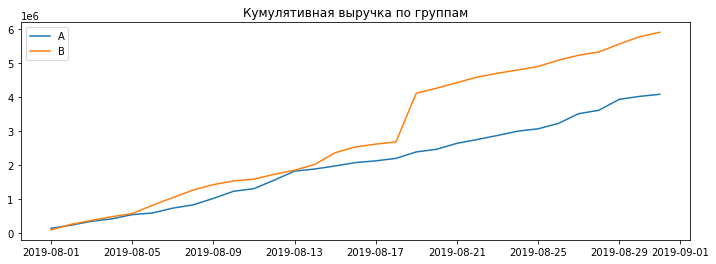

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 4))
plt.title('Кумулятивная выручка по группам')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

### Построение графика кумулятивной выручки по группам. 
Выручка почти равномерно увеличивается в течение всего теста. Это хорошо.

В начале теста группы вели себя раномерно, затем группа `B` обогнала группe `A` и осталась выше до конца  теста. 

Однако в группе `B` есть резкий скачок. Возможно, что это всплеск числа заказов, либо появление очень дорогих заказов в выборке. 

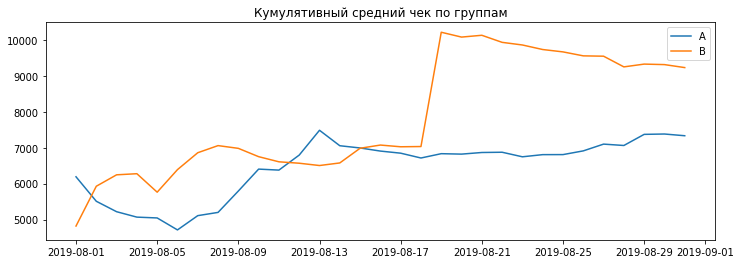

In [23]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.legend();

### Построение графика кумулятивного среднего чека по группам.
Средний чек группы `A` стал равномерным с середины теста. 
Средний чек группы `B` имеет в середине теста скачок и продолжает падать. Возможно, в группу `B` попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку или очистить данные от аномалий.

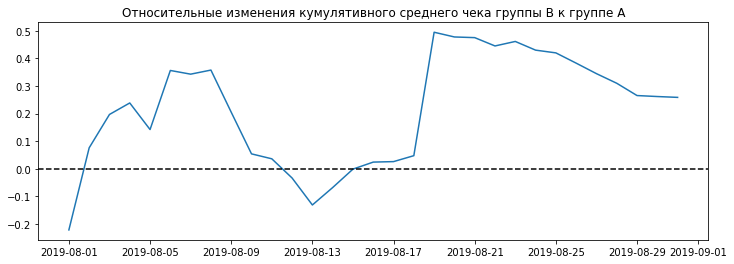

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 4))
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A')
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A
В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

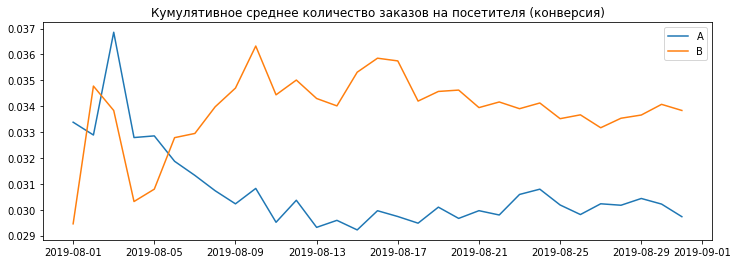

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 4))
plt.title('Кумулятивное среднее количество заказов на посетителя (конверсия)')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

### Построение графика кумулятивного среднего количества заказов на посетителя по группам
В начале теста группы колебались около одного значения, но затем конверсия группы `B` вырвалась вперёд и зафиксировалась, а конверсия группы `A` просела и также зафиксировалась.

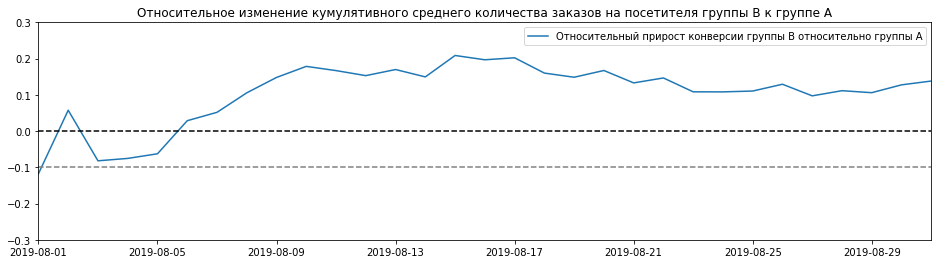

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 4))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([cumulativeDataA['date'].min(), cumulativeDataA['date'].max(), -0.3, 0.3]);

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
В начале теста группа `B` проигрывала группе `A`, затем вырвалась вперёд и стабилизировалась. Но еще держим в уме аномалии, возможно, они приукрашивают картину. 

In [27]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


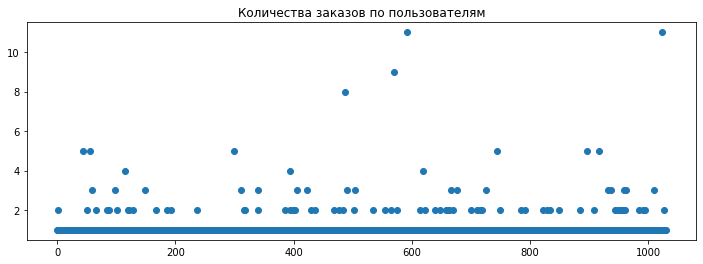

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 4))
plt.title('Количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']);

### Построение точечного графика количества заказов по пользователям. 
Большинство покупателей заказывали только один раз. Доля пользователей с 2 заказами тоже значительна. 
Незначительную долю занимают пользователи от 3 заказов, но точная доля не ясна — непонятно, считать их аномалиями или нет. 


In [29]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


### Посчитали 95-й и 99-й перцентили количества заказов на пользователя. 
95% пользователей делали до 2 заказов включительно, пользователей с 3 и более заказами можно считать приятными для бизнеса аномалиями.

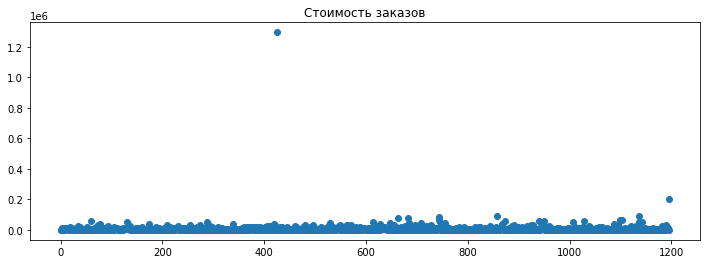

In [30]:
plt.figure(figsize=(12, 4))
plt.title('Стоимость заказов')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

### Построение точечного график стоимостей заказов
Основная масса стоимости закзов находится в пределах 100 000, но точные рамки расчитаем ниже. 

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


### Посчитали 95-й и 99-й перцентили стоимости заказов
95% заказов стоят до 28000, 99% заказов стоят до 58233. Возьму за аномалии заказы до 30 000. 

In [32]:
print("Перцентиль стоимости заказа до 30 000 = {0:.2%}".format(orders['revenue'][orders['revenue'] < 30000].count()/orders['revenue'].count()))

Перцентиль стоимости заказа до 30 000 = 95.49%


In [33]:
print("Перцентиль кол-ва заказов до 3 = {0:.2%}".format(ordersByUsers['orders'][ordersByUsers['orders'] < 3].count()/ordersByUsers['orders'].count()))

Перцентиль кол-ва заказов до 3 = 97.09%


Сформулируем гипотезы. 

`Нулевая`: различий в среднем количестве заказов между группами нет. 

`Альтернативная`: различия в среднем между группами есть.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. Т.к. p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выигрыш группы B равен 13.8% — второе число в выводе.

`Нулевая гипотеза`: различий в среднем чеке между группами нет. 

`Альтернативная гипотеза`: различия в среднем чеке между группами есть.

In [38]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
Вывод: По «сырым» данным различий в среднем чеке групп A и B нет, т.к. p-value = 0.729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

Сформулируем гипотезы для очищенных данных. 

`Нулевая`: различий в среднем количестве заказов между группами нет. 

`Альтернативная`: различия в среднем между группами есть.

In [39]:
# посчитаем кол-во аномальных пользователей(кол-во заказы от 3 и выше, сумма заказов от 30000 и выше)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
68


In [40]:
# исключим из выборки аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.172


### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным.  
Вывод: По «очищенным» данным различия в среднем числе заказов групп `A` и `B` так же есть. Т.к. p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выигрыш группы `B` равен 17.2% — второе число в выводе. Т.е. по "очищенным" данным, кол-во заказов растет в группе `B` больше, чем по "сырым".


`Нулевая гипотеза`: различий в среднем чеке между группами нет. 

`Альтернативная гипотеза`: различия в среднем чеке между группами есть.

In [42]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.720
-0.023


### Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
P-value практически не изменился, но разница между сегментами сократилась с 26% до 2%. Вывод: По «очищенным» данным различий в среднем чеке групп A и B нет, т.к. p-value = 0.720 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B по «очищенным» данным всего на 2,3% ниже среднего чека группы A.

### Решение по результатам теста 

Имеющиеся факты:
- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по «очищенным» данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным;
- График различия среднего количества заказов по "сырым" данным между группами сообщает, что результаты группы B лучше группы A:
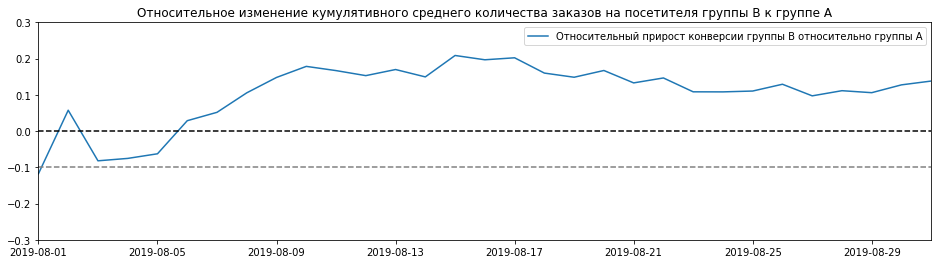
- График различия среднего количества заказов по "очищенным" данным между группами практически повторяет график по "сырым" данным:
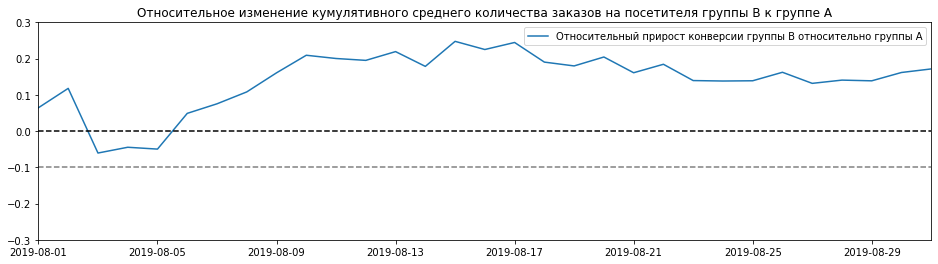
- По графику различия среднего чека по "сырым" данным выводы сделать не возможно, кроме наличия скачков, связаных с аномалиями:
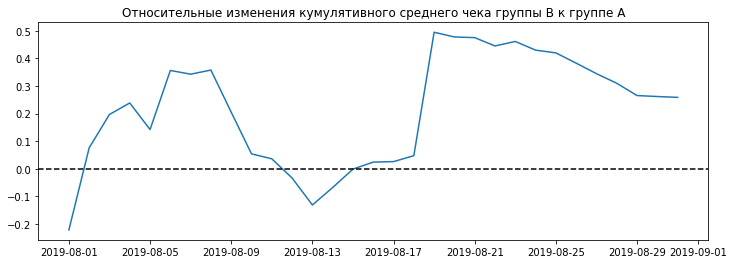
- График различия среднего чека по "очищенным" данным показывает стабилизацию изменений средних чеков групп с середины теста:
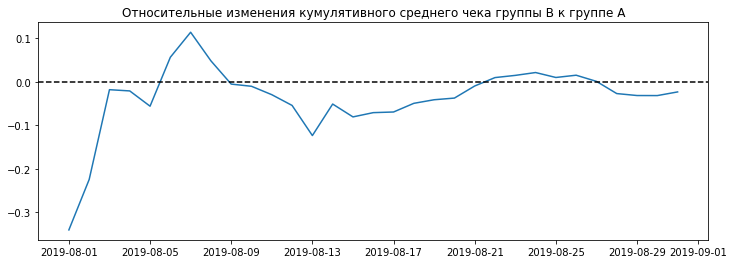

Исходя из обнаруженных фактов, тест можно остановить и признать его успешным. 
Он показал рост среднего количества заказов в группе `B`, хотя средний чек остался на прежнем уровне. 

# Графики по очищенным данным.

In [43]:
order_1 = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [44]:
order_1.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,460
B,542


In [45]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups_1 = order_1[['date','group']].drop_duplicates()

In [46]:
# создадим кумулятивные данные по заказам
ordersAggregated_1 = datesGroups_1.apply(lambda x: order_1[np.logical_and(order_1['date'] <= x['date'], order_1['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [47]:
# создадим кумулятивные данные по покупателям
visitorsAggregated_1 = datesGroups_1.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated_1.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
174,2019-08-02,B,1294
291,2019-08-03,A,1845


In [48]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData_1 = ordersAggregated_1.merge(visitorsAggregated_1, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_1.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData_1.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,18,17,112340,719
1,2019-08-01,B,19,19,78258,713
2,2019-08-02,A,37,35,204472,1338
3,2019-08-02,B,40,39,171492,1294
4,2019-08-03,A,61,59,316945,1845


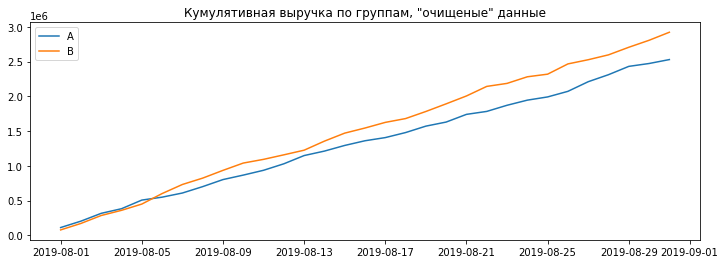

In [49]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_1 = cumulativeData_1[cumulativeData_1['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_1 = cumulativeData_1[cumulativeData_1['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 4))
plt.title('Кумулятивная выручка по группам, "очищеные" данные')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA_1['date'], cumulativeRevenueA_1['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB_1['date'], cumulativeRevenueB_1['revenue'], label='B')

plt.legend();

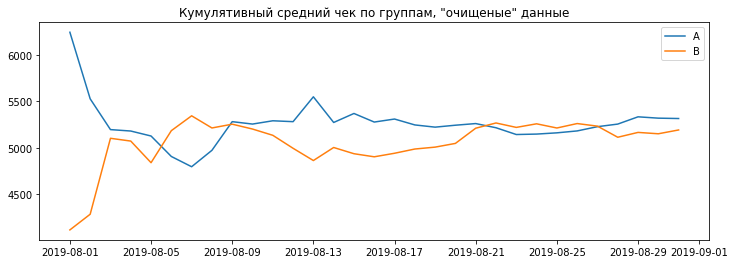

In [50]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA_1['date'], cumulativeRevenueA_1['revenue']/cumulativeRevenueA_1['orders'], label='A')
plt.plot(cumulativeRevenueB_1['date'], cumulativeRevenueB_1['revenue']/cumulativeRevenueB_1['orders'], label='B')
plt.title('Кумулятивный средний чек по группам, "очищеные" данные')
plt.legend();

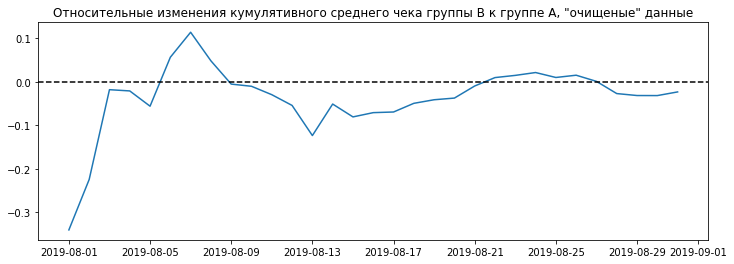

In [51]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue_1 = cumulativeRevenueA_1.merge(cumulativeRevenueB_1, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 4))
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A, "очищеные" данные')
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue_1['date'], (mergedCumulativeRevenue_1['revenueB']/mergedCumulativeRevenue_1['ordersB'])/(mergedCumulativeRevenue_1['revenueA']/mergedCumulativeRevenue_1['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

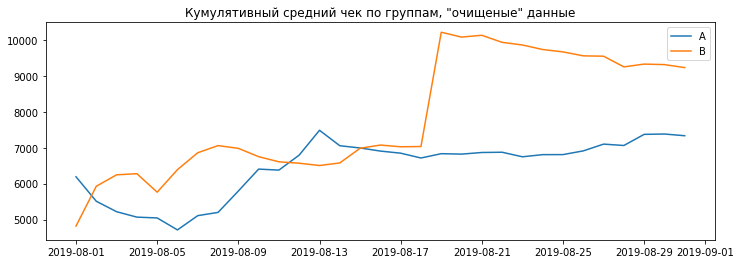

In [52]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам, "очищеные" данные')
plt.legend();

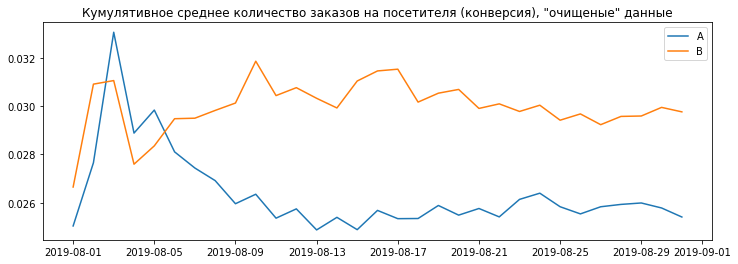

In [53]:
# считаем кумулятивную конверсию
cumulativeData_1['conversion'] = cumulativeData_1['orders']/cumulativeData_1['visitors']

# отделяем данные по группе A
cumulativeDataA_1 = cumulativeData_1[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB_1 = cumulativeData_1[cumulativeData_1['group']=='B']

# строим графики
plt.figure(figsize=(12, 4))
plt.title('Кумулятивное среднее количество заказов на посетителя (конверсия), "очищеные" данные')
plt.plot(cumulativeDataA_1['date'], cumulativeDataA_1['conversion'], label='A')
plt.plot(cumulativeDataB_1['date'], cumulativeDataB_1['conversion'], label='B')
plt.legend();

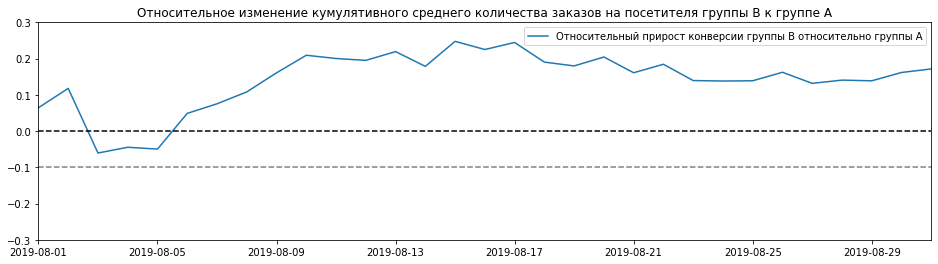

In [54]:
mergedCumulativeConversions_1 = cumulativeDataA_1[['date','conversion']].merge(cumulativeDataB_1[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 4))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeConversions_1['date'], mergedCumulativeConversions_1['conversionB']/mergedCumulativeConversions_1['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([cumulativeDataA_1['date'].min(), cumulativeDataA_1['date'].max(), -0.3, 0.3]);

## Общий вывод:

### На основании общей информации по датафрейму hypothesis:
1. Привели названия столбцов к нижему регистру. 

### На основании общей информации по датафрейму orders сделал следующие выводы:
1. Столбец `date` перевели в формат datetime;
2. Есть аномалии в столбце `revenue`, без изменений, т.к. необходимы в анализе и влияют ли они на его результат.
3. Группа A состоит из 503 пользователей, а В из 586 пользователей. Может показаться, что это может влиять на анализ, но мы используем в анализе усредненные показатели(средний чек, средне кол-во заказов)


### На основании общей информации по датафрейму visitors сделал следующие выводы:
1.  Столбец `date` перевели в формат datetime.

### Применение фреймворк ICE для приоритизации гипотез. 
Применение фреймворк ICE показало, что перспективные гипотезы №№ 8, 0 и 7.

Гипотезы №№ 5, 3 и 4 имеют самые низкие приоритеты.

|№ |	краткое описание гипотезы	|ICE|
|:---|:-------|:----:|
|8	|Запустить акцию, дающую скидку на товар в день рождения	|16.200000|
|0	|Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	|13.333333|
|7|	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	|11.200000|
|6|	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	|8.000000||
|2	|Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	|7.000000|
|1	|Запустить собственную службу доставки, что сократит срок доставки заказов	|2.000000|
|5	|Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	|1.333333|
|3|	Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	|1.125000|
|4	|Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	|1.000000|

### Применение фреймворк RICE для приоритизации гипотез. 
Применение фреймворк RICE показало, что перспективные гипотезы №№ 7, 2 и 0.

Гипотезы №№ 1, 5 и 4 имеют самые низкие приоритеты.

|№ |	краткое описание гипотезы	|RICE|
|:---|:-------|:----:|
|7	|Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	|112.0|
|2	|Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	|56.0|
|0	|Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	|40.0|
|6	|Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	|40.0|
|8	|Запустить акцию, дающую скидку на товар в день рождения	|16.2|
|3|	Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	|9.0|
|1|	Запустить собственную службу доставки, что сократит срок доставки заказов	|4.0|
|5|	Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	|4.0|
|4|	Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	|3.0|

### Изменения приоритизация гипотез при применении RICE вместо ICE. 
- Применение фреймворк ICE показало, что перспективные гипотезы №№ 8, 0 и 7.
- Применение фреймворк RICE показало, что перспективные гипотезы №№ 7, 2 и 0.
- Среди тройки лидеров по фреймворкам ICE и RICE оставались только гипотезы №№ 0 и 7. 
- Лидер по ICE гипотеза №8 стала по RICE только пятым! Гипотеза № 7 с третьего места по ICE стала лидером по RICE. Гипотеза №2 с пятого места по ICE заняла второе место по RICE. Гипотеза № 0 со второго места по ICE стала третьей по RICE.
- Данные изменения связаны с параметром `Reach` — охват пользователей. Самый высокий (10) он у гипотезы №7, что позволило ей стать самой перспективной гипотезой по RICE, вызвано, скорее всего тем, что при подписки 100% пользователей указывают свою эл.почту. Самый низкий (1) у гипотезы №5, что уронило ее рейтинг по RICE, вызвано, скорее всего тем, что дату рождения указывает около 10% пользователей. 

### Построение графика кумулятивной выручки по группам. 
Выручка почти равномерно увеличивается в течение всего теста. Это хорошо.

В начале теста группы вели себя раномерно, затем группа `B` обогнала группe `A` и осталась выше до конца  теста. 

Однако в группе `B` есть резкий скачок. Возможно, что это всплеск числа заказов, либо появление очень дорогих заказов в выборке. 

### Построение графика кумулятивного среднего чека по группам.
Средний чек группы `A` стал равномерным с середины теста. 
Средний чек группы `B` имеет в середине теста скачок и продолжает падать. Возможно, в группу `B` попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку или очистить данные от аномалий.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A
В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

### Построение графика кумулятивного среднего количества заказов на посетителя по группам
В начале теста группы колебались около одного значения, но затем конверсия группы `B` вырвалась вперёд и зафиксировалась, а конверсия группы `A` просела и также зафиксировалась.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
В начале теста группа `B` проигрывала группе `A`, затем вырвалась вперёд и стабилизировалась. Но еще держим в уме аномалии, возможно, они приукрашивают картину. 

### Построение точечного графика количества заказов по пользователям. 
Большинство покупателей заказывали только один раз. Доля пользователей с 2 заказами тоже значительна. 
Незначительную долю занимают пользователи от 3 заказов, но точная доля не ясна — непонятно, считать их аномалиями или нет. 


### Посчитали 95-й и 99-й перцентили количества заказов на пользователя. 
95% пользователей делали до 2 заказов включительно, пользователей с 3 и более заказами можно считать приятными для бизнеса аномалиями.

### Построение точечного график стоимостей заказов
Основная масса стоимости закзов находится в пределах 100 000, но точные рамки расчитаем ниже. 

### Посчитали 95-й и 99-й перцентили стоимости заказов
95% заказов стоят до 28000, 99% заказов стоят до 58233. Возьму за аномалии заказы до 30 000. 

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. Т.к. p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выигрыш группы B равен 13.8% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
Вывод: По «сырым» данным различий в среднем чеке групп A и B нет, т.к. p-value = 0.729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным.  
Вывод: По «очищиным» данным различия в среднем числе заказов групп `A` и `B` так же есть. Т.к. p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выигрыш группы `B` равен 17.2% — второе число в выводе. Т.е. по "очищенным" данным, кол-во заказов растет в группе `B` больше, чем по "сырым".


### Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
P-value практически не изменился, но разница между сегментами сократилась с 26% до 2%. Вывод: По «очищенным» данным различий в среднем чеке групп A и B нет, т.к. p-value = 0.720 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B по «очищенным» данным всего на 2,3% ниже среднего чека группы A.

### Решение по результатам теста 

Имеющиеся факты:
- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по «очищенным» данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным;
- График различия среднего количества заказов по "сырым" данным между группами сообщает, что результаты группы B лучше группы A:
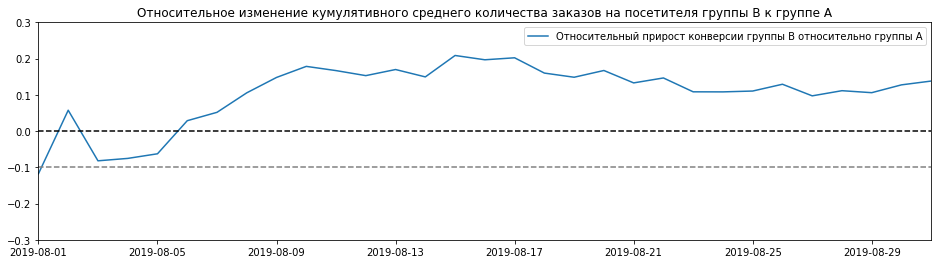
- График различия среднего количества заказов по "очищенным" данным между группами практически повторяет график по "сырым" данным:
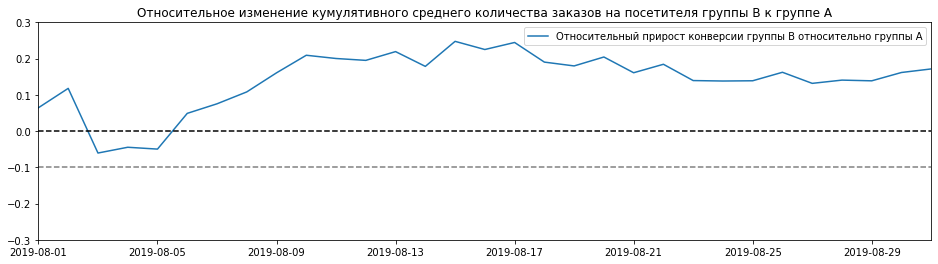
- По графику различия среднего чека по "сырым" данным выводы сделать не возможно, кроме наличия скачков, связаных с аномалиями:
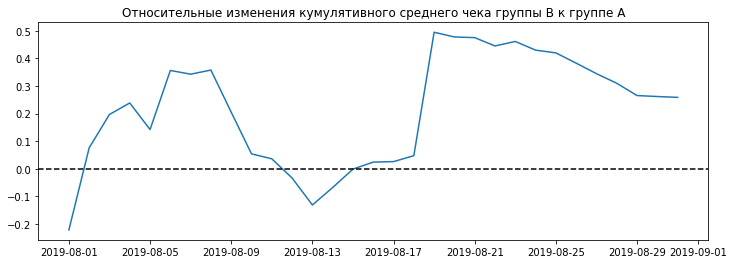
- График различия среднего чека по "очищенным" данным показывает стабилизацию изменений средних чеков групп с середины теста:
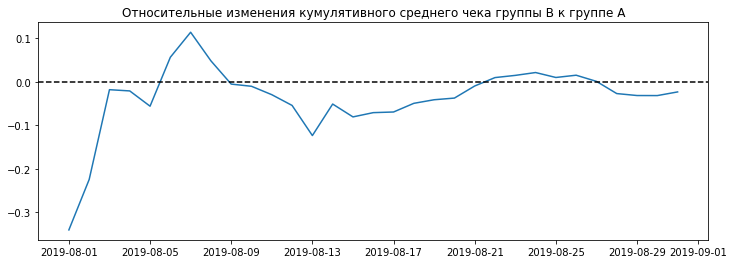

Исходя из обнаруженных фактов, тест можно остановить и признать его успешным. 
Он показал рост среднего количества заказов в группе `B`, хотя средний чек остался на прежнем уровне. 